# 第18章 继承
## 18.1 卡片对象

我们可以对卡牌的属性:rank（大小）、suit（花色）进行编码，见下面的注释。

In [12]:
"""
suit:
Clubs梅花♣     → 0
Diamonds方片♦  → 1
Hearts红桃♥    → 2
Spades黑桃♠    → 3
"""

"""
rank:
Jack    → 11
Queen   → 12
King    → 13
"""

class Card:
    def __init__(self,suit=0,rank=2):
        self.suit=suit
        self.rank=rank

创建一个Card对象，指定花色和大小，比如创建 方片12

In [13]:
queen_of_diamonds = Card(1,12)

## 18.2 类属性
为了将Card对象打印成容易阅读的格式，我们可以使用**字符串列表**,将整数编码映射成对应的大小和花色。

In [14]:
class Card:
    suit_names = ['Clubs梅花♣ ','Diamonds方片♦','Hearts红桃♥','Spades黑桃♠']
    rank_names = [None,'Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']    
    
    def __init__(self,suit=0,rank=2):
        self.suit=suit
        self.rank=rank
        
    def __str__(self):
        return '{}:{}'.format(Card.suit_names[self.suit],Card.rank_names[self.rank])

In [15]:
print(queen_of_diamonds)

**类属性**：像suit_names和rank_names这样的变量定义在类中，又在任何方法之外。
**实例属性**:像suit和rank之类的与一个特定的实例或者对象相关联的变量。

In [16]:
card1 = Card(2,11)
print(card1)

Hearts红桃♥:Jack


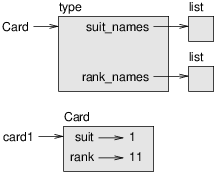

## 18.3 对比卡牌

对于内置类型，我们可以通过比较操作符（ < 、 > 、 == 等）来比较对象并返回bool。<br>
对于用户定义类型，我们可以通过提供一个方法`__lt__`，代表"less than"，重载内置操作符。

In [17]:
class Card:
    suit_names = ['Clubs梅花♣ ','Diamonds方片♦','Hearts红桃♥','Spades黑桃♠']
    rank_names = [None,'Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']    
    
    def __init__(self,suit=0,rank=2):
        self.suit=suit
        self.rank=rank
        
    def __str__(self):
        return '{}:{}'.format(Card.suit_names[self.suit],Card.rank_names[self.rank])
    
    def __lt__(self,other):
        # 检查花色
        if self.suit < other.suit : return True
        if self.suit > other.suit : return False
        
        # 花色相同，检查大小
        return self.rank < other.rank

也可以使用元组比较，

In [18]:
class Card:
    suit_names = ['Clubs梅花♣ ','Diamonds方片♦','Hearts红桃♥','Spades黑桃♠']
    rank_names = [None,'Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']    
    
    def __init__(self,suit=0,rank=2):
        self.suit=suit
        self.rank=rank
        
    def __str__(self):
        return '{}:{}'.format(Card.suit_names[self.suit],Card.rank_names[self.rank])
    
    def __lt__(self,other):
        t1 = self.suit , self.rank
        t2 = other.suit , other.rank
        
        return t1 < t2

## 18.4 牌组
## 18.5 打印牌组
## 18.6 添加、删除、洗牌和排序
有了卡牌，下一步定义牌组（deck）。<br>

init方法创建cards属性，str方法打印牌组。

In [58]:
import random

class Deck():
    
    def __init__(self):
        """
        生成52张牌的标准牌组 
        """
        self.cards = []
        for suit in range(4):          # 0-3
            for rank in range(1,14):   # 1-13
                card = Card(suit,rank)
                self.cards.append(card)
            
    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)
    
    def pop_card(self):
        """
        发牌/牌组中删除一张牌
        """
        return self.cards.pop()

    def add_card(self,card):
        """
        牌组添加一张牌
        """
        self.cards.append(card)
        
    def shuffle(self):
        """
        洗牌，引入rando模块
        """
        random.shuffle(self.cards)
        
    def sort(self):
        """
        冒泡排序
        """
        length = len(self.cards)
        for i in range (0,length):
            for j in range (length-1-i):
                if not self.cards[j] < self.cards[j+1]:
                    self.cards[j],self.cards[j+1] =  self.cards[j+1],self.cards[j]
                
    def move_cards(self,hand,num):
        """
        将主体中的num张牌移动到hand的cards中
        """
        for i in range(num):
            hand.add_card(self.pop_card())

In [59]:
deck = Deck()
deck.pop_card()

deck.add_card(Card(2,3))
deck.shuffle()
print(deck)

Diamonds方片♦:4
Clubs梅花♣ :2
Spades黑桃♠:7
Spades黑桃♠:Jack
Hearts红桃♥:10
Clubs梅花♣ :3
Hearts红桃♥:Jack
Clubs梅花♣ :5
Diamonds方片♦:Queen
Spades黑桃♠:3
Diamonds方片♦:5
Hearts红桃♥:4
Diamonds方片♦:King
Diamonds方片♦:Ace
Hearts红桃♥:6
Diamonds方片♦:10
Clubs梅花♣ :9
Spades黑桃♠:4
Spades黑桃♠:8
Hearts红桃♥:7
Clubs梅花♣ :10
Spades黑桃♠:Queen
Diamonds方片♦:7
Clubs梅花♣ :6
Spades黑桃♠:10
Clubs梅花♣ :7
Diamonds方片♦:6
Diamonds方片♦:Jack
Spades黑桃♠:2
Diamonds方片♦:2
Clubs梅花♣ :King
Hearts红桃♥:2
Clubs梅花♣ :Jack
Hearts红桃♥:Ace
Hearts红桃♥:3
Spades黑桃♠:9
Hearts红桃♥:5
Clubs梅花♣ :Queen
Clubs梅花♣ :4
Hearts红桃♥:8
Hearts红桃♥:3
Clubs梅花♣ :8
Diamonds方片♦:9
Clubs梅花♣ :Ace
Diamonds方片♦:3
Spades黑桃♠:Ace
Hearts红桃♥:9
Diamonds方片♦:8
Hearts红桃♥:King
Spades黑桃♠:6
Spades黑桃♠:5
Hearts红桃♥:Queen


In [60]:
deck.sort()
print(deck)

Clubs梅花♣ :Ace
Clubs梅花♣ :2
Clubs梅花♣ :3
Clubs梅花♣ :4
Clubs梅花♣ :5
Clubs梅花♣ :6
Clubs梅花♣ :7
Clubs梅花♣ :8
Clubs梅花♣ :9
Clubs梅花♣ :10
Clubs梅花♣ :Jack
Clubs梅花♣ :Queen
Clubs梅花♣ :King
Diamonds方片♦:Ace
Diamonds方片♦:2
Diamonds方片♦:3
Diamonds方片♦:4
Diamonds方片♦:5
Diamonds方片♦:6
Diamonds方片♦:7
Diamonds方片♦:8
Diamonds方片♦:9
Diamonds方片♦:10
Diamonds方片♦:Jack
Diamonds方片♦:Queen
Diamonds方片♦:King
Hearts红桃♥:Ace
Hearts红桃♥:2
Hearts红桃♥:3
Hearts红桃♥:3
Hearts红桃♥:4
Hearts红桃♥:5
Hearts红桃♥:6
Hearts红桃♥:7
Hearts红桃♥:8
Hearts红桃♥:9
Hearts红桃♥:10
Hearts红桃♥:Jack
Hearts红桃♥:Queen
Hearts红桃♥:King
Spades黑桃♠:Ace
Spades黑桃♠:2
Spades黑桃♠:3
Spades黑桃♠:4
Spades黑桃♠:5
Spades黑桃♠:6
Spades黑桃♠:7
Spades黑桃♠:8
Spades黑桃♠:9
Spades黑桃♠:10
Spades黑桃♠:Jack
Spades黑桃♠:Queen


## 18.7 继承
定义一副手牌，继承牌组。

In [65]:
class Hand(Deck):
    def __init__(self,lable=''):
        self.cards=[]
        self.lable=lable

In [66]:
hand = Hand('new hand')
deck.move_cards(hand,3)
print(hand)

#     def move_cards(self,hand,num):
#         """
#         将主体中的num张牌移动到hand的cards中
#         """
#         for i in range(num):
#             hand.add_card(self.pop_card())

Spades黑桃♠:9
Spades黑桃♠:8
Spades黑桃♠:7


move_cards函数接收两个参数，Hand对象以及需要出牌的牌数。<br>

有的情况下，卡牌会从一副手牌中移除转入到另一副手牌中，或者从手牌中回到牌组，这两种情况都可以用move_cards函数完成<br>
- self既可以是一个Deck对象，也可以是一个Hand对象。
- hand参数，虽然名字是hand，但也可以是一个Deck对象。

**继承**可以促进代码复用，可以在不修改父类的前提下对它的行为进行定制化，但另一方面也可能会让代码更难读。

## 18.8 类图
类之间有下面几种关联：
- 一个类的对象可能包含其他类的对象的**引用**。这种关联称为**HAS-A**（有一个）
- 一个类**继承**自另一个类。这种关系称为**IS-A（是一个）**
- 一个类**依赖**于另一个类。一个类的对象接收另一个类的对象作为参数，或者使用另一个类的对象进行某种计算，这种关系称为**依赖（dependency）**

下面的类图，展示了Card、Deck、Hand类之间的关系：
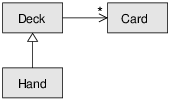
空心三角形箭头的线代表继承，标准的箭头代表引用，\*号表示Deck类可以有任意数量的Card引用。<br>
依赖关系通常使用虚线箭头表示，参考链接：https://blog.csdn.net/yhy_it/article/details/83389222